In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [365]:
df = pd.read_csv('HRDataset.csv')

In [366]:
df_backup = df.copy()

# Data Exploration and Preparation

In [352]:
df.sample(7)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
35,"Westinghouse, Matthew",1.009920e+09,1.0,1.0,1.0,1.0,3.0,3.0,0.0,45.00,...,IT/IS,Brian Champaigne,13.0,Indeed,Fully Meets,1.82,3.0,6.0,1/2/2019,0.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
130,"Squatrito, Kristen",1.405067e+09,0.0,2.0,0.0,5.0,5.0,4.0,0.0,21.00,...,Production,David Stanley,14.0,MBTA ads,Exceeds,1.97,4.0,0.0,NaN,NaN
74,"Albert, Michael",1.501072e+09,0.0,2.0,1.0,1.0,5.0,3.0,0.0,54.50,...,Production,Janet King,2.0,Employee Referral,Fully Meets,3.93,3.0,0.0,2/27/2019,0.0
115,"Sparks, Taylor",1.410071e+09,1.0,1.0,0.0,1.0,5.0,1.0,0.0,16.00,...,Production,Brannon Miller,12.0,Billboard,PIP,4.11,2.0,0.0,2/25/2019,0.0
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Gilles, Alex",1.008021e+09,1.0,1.0,1.0,5.0,5.0,2.0,1.0,15.00,...,Production,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4.0,0.0,NaN,NaN


In [353]:
df.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [354]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [355]:
df[['Employee_Name','DOB']]

,Employee_Name,DOB
0,"Brown, Mia",11/24/87
1,"LaRotonda, William",04/26/84
2,"Steans, Tyrone",09/01/86
3,"Howard, Estelle",09/16/85
4,"Singh, Nan",05/19/88
...,...,...
396,NaN,NaN
397,NaN,NaN
398,NaN,NaN
399,NaN,NaN


In [356]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

In [357]:
erroneous_dobs = df[df['DOB'] > pd.to_datetime('2000-01-01')]
erroneous_dobs['DOB']

6     2064-06-01
7     2063-05-15
12    2054-10-12
22    2063-08-28
31    2068-01-15
32    2065-05-07
54    2066-03-17
57    2064-01-04
61    2068-07-06
73    2054-09-21
74    2068-10-10
87    2055-11-14
91    2067-04-19
101   2065-05-09
102   2065-09-09
112   2067-06-03
115   2068-07-20
116   2067-06-05
146   2068-08-15
155   2064-04-13
157   2068-05-30
159   2061-06-19
160   2068-06-06
164   2058-12-27
175   2065-02-02
184   2066-03-22
195   2051-01-02
200   2059-08-19
213   2055-04-14
215   2052-08-18
231   2064-10-12
235   2058-11-07
242   2067-01-16
247   2063-10-30
248   2053-05-24
249   2066-04-17
250   2051-02-25
279   2052-02-11
298   2066-11-22
303   2064-07-30
305   2052-01-18
308   2065-09-09
Name: DOB, dtype: datetime64[ns]

In [358]:
def correct_dob(row):

    if (row['DOB'] < pd.to_datetime('2000-01-01')):
        dob = row["DOB"]
    else:
        dob = row['DOB'] - relativedelta(years=100)
    return dob

In [359]:
df['Correct_DOB'] = df.apply(lambda row: correct_dob(row),axis=1)

IllegalMonthError: bad month number nan; must be 1-12

In [ ]:
df.drop(['DOB'], axis=1, inplace=True)

In [ ]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    delta = end_date - row['DateofHire']
    seniority_years = delta.total_seconds() / (365.25 * 24 * 3600)
    return seniority_years

In [ ]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [ ]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)

In [ ]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Correct_DOB,Seniority
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310,103,302.000000,310.000000,310.000000,310.000000,310,310.000000
mean,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,2.983871,0.093548,31.284806,0.332258,16.838710,6569.732258,2013-01-27 09:08:07.741935360,2014-01-18 20:16:18.640776704,14.579470,3.332097,3.890323,1.209677,1979-01-26 14:00:46.451612896,4.773355
min,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1013.000000,2006-01-09 00:00:00,2010-07-30 00:00:00,1.000000,1.030000,1.000000,0.000000,1951-01-02 00:00:00,0.005476
25%,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,20.000000,0.000000,18.000000,1901.250000,2011-07-11 00:00:00,2012-08-31 12:00:00,10.000000,2.082500,3.000000,0.000000,1973-11-30 12:00:00,3.000684
50%,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,24.000000,0.000000,19.000000,2132.000000,2013-02-03 12:00:00,2014-03-31 00:00:00,15.000000,3.470000,4.000000,0.000000,1980-09-12 12:00:00,4.992471
75%,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,45.315000,1.000000,20.000000,2357.000000,2014-09-10 06:00:00,2015-09-09 12:00:00,19.000000,4.520000,5.000000,0.000000,1986-05-17 18:00:00,6.220397
max,1.988300e+09,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,80.000000,1.000000,30.000000,98052.000000,2017-04-20 00:00:00,2016-06-16 00:00:00,39.000000,5.000000,5.000000,8.000000,1992-08-17 00:00:00,13.713895
std,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,0.577124,0.291670,15.383615,0.471785,6.232272,16933.864054,NaN,NaN,8.090352,1.290590,0.910690,2.352009,NaN,2.638686


In [ ]:
df['Employee_Name'].unique()

array(['Brown, Mia', 'LaRotonda, William  ', 'Steans, Tyrone  ',
       'Howard, Estelle', 'Singh, Nan ', 'Smith, Leigh Ann',
       'Bunbury, Jessica', 'Carter, Michelle ', 'Dietrich, Jenna  ',
       'Digitale, Alfred', 'Friedman, Gerry', 'Gill, Whitney  ',
       'Gonzales, Ricardo', 'Guilianno, Mike', 'Leruth, Giovanni',
       'Mullaney, Howard', 'Ozark, Travis', 'Strong, Caitrin',
       'Valentin,Jackie', 'Villanueva, Noah', 'Buck, Edward',
       'Costa, Latia', 'Fraval, Maruk ', 'Givens, Myriam',
       'Jeremy Prater', 'Khemmich, Bartholemew', 'Martins, Joseph',
       'McKinzie, Jac', 'Nguyen, Dheepa', 'Onque, Jasmine', 'Potts, Xana',
       'Riordan, Michael', 'Terry, Sharlene ', 'Rachael, Maggie',
       'Smith, Jason', 'Westinghouse, Matthew', 'Hubert, Robert',
       'Champaigne, Brian', 'Zamora, Jennifer', 'Roper, Katie',
       'Becker, Renee', 'Goble, Taisha', 'Hernandez, Daniff',
       'Horton, Jayne', 'Johnson, Noelle ', 'Murray, Thomas',
       'Pearson, Randall',

In [ ]:
df['Position'].unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Architect',
       'Database Administrator', 'Data Analyst', 'Data Analyst ',
       'Director of Operations', 'Director of Sales', 'IT Director',
       'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support',
       'IT Support', 'Network Engineer', 'President & CEO',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Enterprise Architect', 'Principal Data Architect',
       'Sr. Network Engineer'], dtype=object)

In [ ]:
df['MaritalDesc'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [ ]:
df_prep = pd.concat([df, pd.get_dummies(df['MaritalDesc'],drop_first=True)],axis=1)


In [ ]:
df_prep['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [ ]:
performance_mapping = {
    'Needs Improvement':1,
    'Fully Meets':2,
    'Exceeds':3,
    'PIP':0
}
df_prep['PerformanceScore_Numeric'] = df_prep['PerformanceScore'].map(performance_mapping)

In [ ]:
df_prep['ManagerID'].unique()

array([ 1., 17., 21., 13.,  5.,  2.,  4.,  6.,  7.,  9., 11., 12., 14.,
       16., 18., 19., 20., 22., 39., nan, 30., 15., 10.,  3.])

In [ ]:
df_prep['ManagerName'].unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater'],
      dtype=object)

In [ ]:
df_prep['PerfScoreID'].unique()

array([3., 1., 4., 2.])

In [ ]:
df_prep['EmpSatisfaction'].unique()

array([2., 4., 5., 3., 1.])

In [ ]:
df_prep['RecruitmentSource'].unique()

array(['Diversity Job Fair', 'Website Banner Ads', 'Internet Search',
       'Pay Per Click - Google', 'Social Networks - Facebook Twitter etc',
       'Billboard', 'Monster.com', 'Newspager/Magazine',
       'Professional Society', 'Other', 'Employee Referral', 'Indeed',
       'Search Engine - Google Bing Yahoo', 'Glassdoor',
       'Vendor Referral', 'MBTA ads', 'Information Session',
       'Word of Mouth', 'Pay Per Click', 'On-campus Recruiting',
       'On-line Web application', 'Careerbuilder',
       'Company Intranet - Partner'], dtype=object)

In [360]:
reference_date = pd.to_datetime('2024-11-11') 
df_prep['Age'] = (reference_date - df_prep['Correct_DOB']).dt.days / 365.25

In [361]:
df_prep['Age']

0      36.966461
1      40.544832
2      38.195756
3      39.154004
4      36.481862
         ...    
305    72.815880
306    38.554415
307    41.754962
308    59.173169
309    46.529774
Name: Age, Length: 310, dtype: float64

In [ ]:
df_prep['Age'].min()

np.float64(32.23545516769336)

In [362]:
df_prep['Age'].max()

np.float64(73.8590006844627)

<Axes: xlabel='Age', ylabel='Count'>

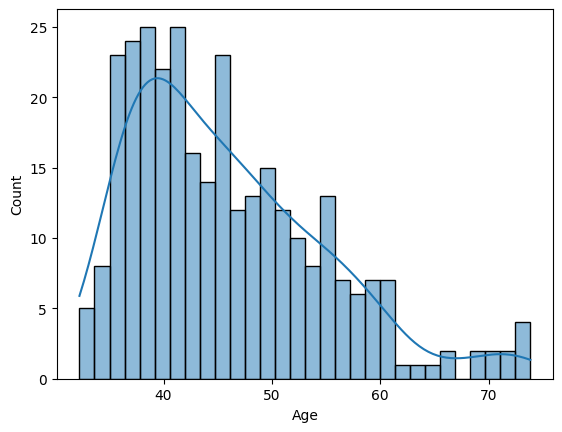

In [364]:
sns.histplot(df_prep['Age'], bins=30, kde=True)

In [ ]:
df_prep['SpecialProjectsCount'].unique()

array([6., 4., 5., 0., 7., 3., 2., 8.])

<Axes: >

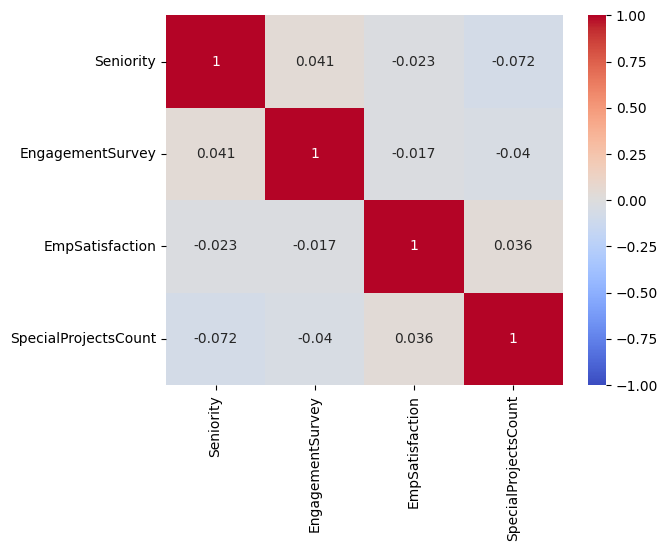

In [ ]:
corr_matrix = df_prep[['Seniority', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)